### Generate test data
Need some very simple data to test models on.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [43]:
DATA_DIR = r"./data"
ANNOTATION_FILE = r"annot"
annotation = os.path.join(DATA_DIR, ANNOTATION_FILE)
print(annotation)

./data/annot


In [44]:
WIDTH = 320
HEIGHT = 320

In [45]:
BOX_MIN = 50
BOX_MAX = 100

In [46]:
NUM_IMAGES = 1000

In [47]:
def generate_random_boximage():
    im = np.zeros((320, 320, 3), dtype=np.float32)

    w = np.random.randint(BOX_MIN, BOX_MAX)
    h = np.random.randint(BOX_MIN, BOX_MAX)
    x = np.random.randint(w, WIDTH-w)
    y = np.random.randint(h, HEIGHT-h)

    im[x:x+w,y:y+h] = (0, 0, 255)
    
    center_x = int(x + w/2)
    center_y = int(y + h/2)
    
    #im /= 255.0
    #center_x /= 255.0
    #center_y /=255.0
    
    return im, (center_x, center_y)

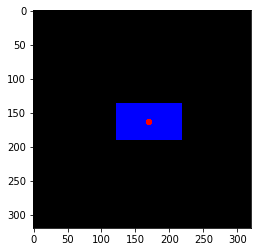

In [48]:
im, center = generate_random_boximage()
im = im.astype(np.uint8)
#center_x = int(center[0] * 255.0)
#center_y = int(center[1] * 255.0)
cv2.circle(im, (center[1], center[0]), 2, (255, 0, 0), thickness=5)

plt.imshow(im)
plt.show()

In [49]:
with open(annotation, 'w') as f:
    for i in range(NUM_IMAGES):
        im_file_name = f"{i}.jpg"
        im, center = generate_random_boximage()
        f.write(f"{im_file_name},{center[0]},{center[1]}\n")
        #im_to_save = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im_to_save = im
        cv2.imwrite(os.path.join(DATA_DIR, im_file_name), im)